In [19]:
from segment_anything import SamPredictor, sam_model_registry, SamAutomaticMaskGenerator
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2

In [20]:
model_checkpoint_path = "sam_vit_h_4b8939.pth"
image_path = "dog.jpeg"

In [21]:
sam = sam_model_registry["vit_h"](checkpoint=model_checkpoint_path)
predictor = SamPredictor(sam)

In [22]:
image = cv2.imread(image_path)
predictor.set_image(image)


In [23]:
mask_generator = SamAutomaticMaskGenerator(sam)

In [24]:
masks = mask_generator.generate(image)

In [25]:
print(len(masks))
print(masks[0].keys())

130
dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])


In [27]:
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)

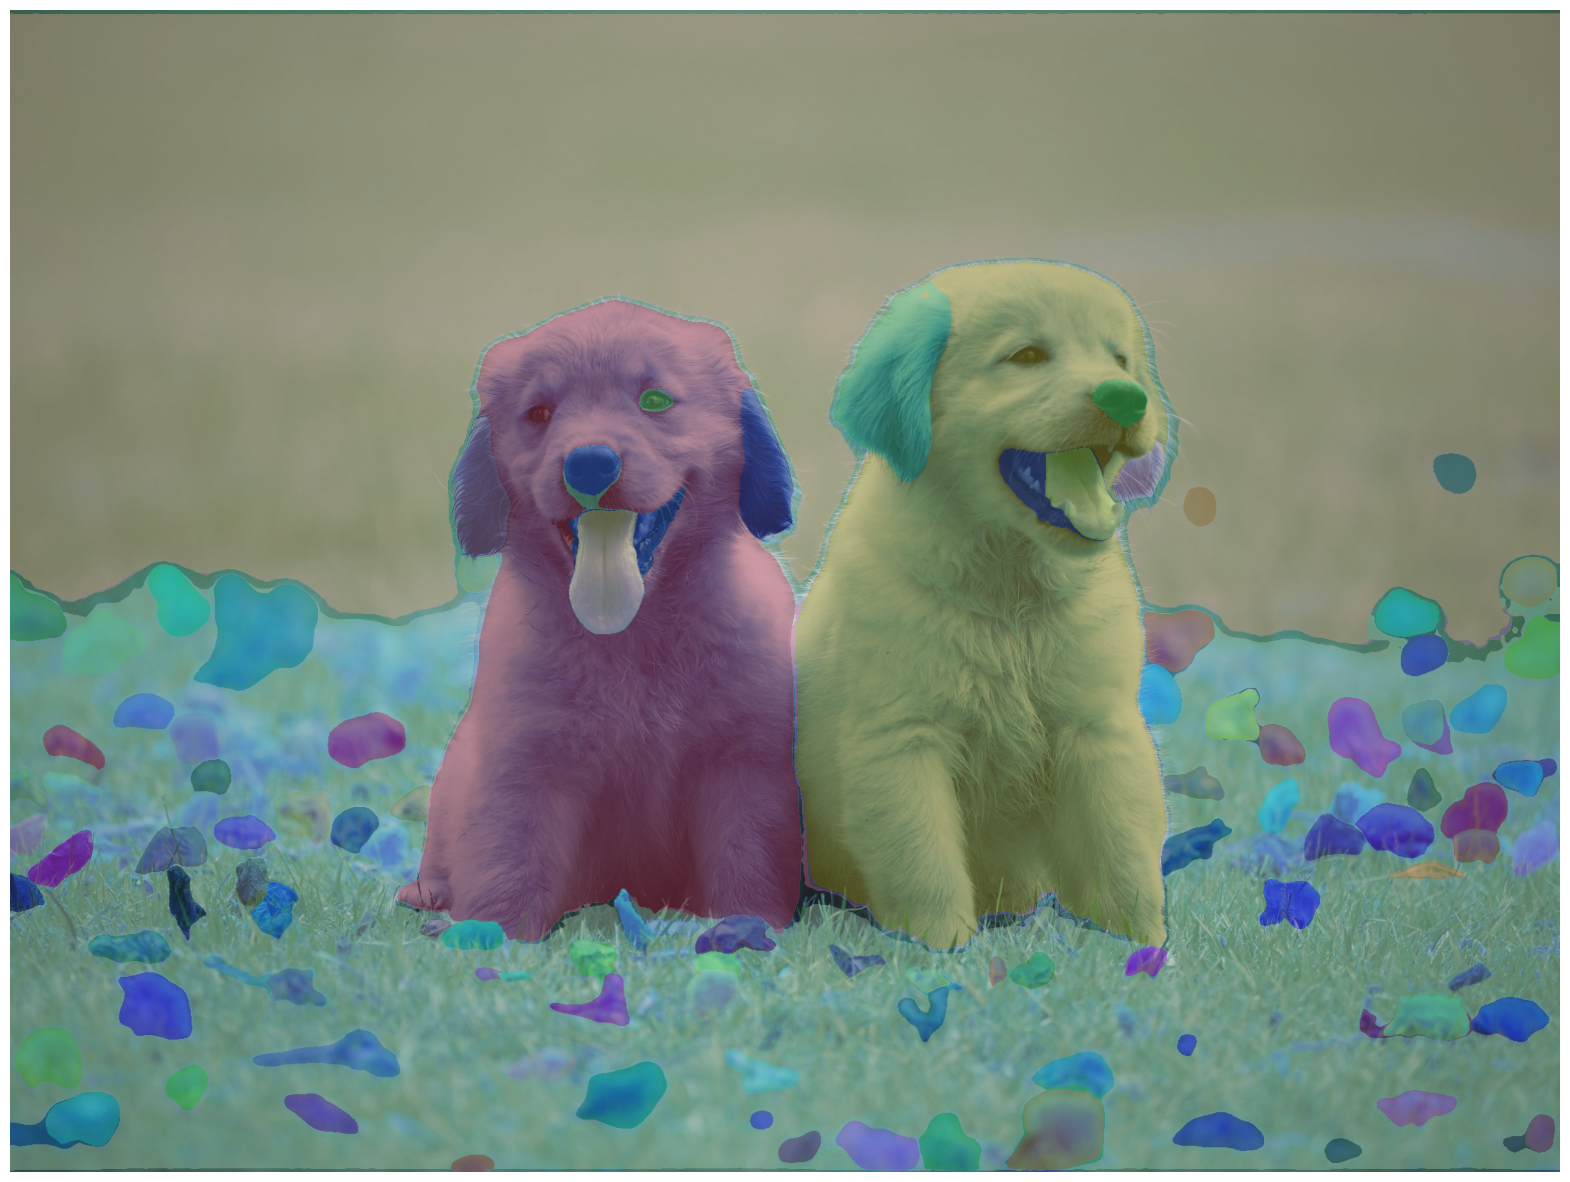

In [28]:
plt.figure(figsize=(20,20))
plt.imshow(image)
show_anns(masks)
plt.axis('off')
plt.show()